### TASK :- 03

##### Sentiment Analysis of Tweets.

#### libraries (modules or packages)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and understand the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Personal\Downloads\fifa19_data (1).csv")
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
# data information and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [27]:
df.shape

(18207, 83)

### Data Preprocessing

Drop unnecessary columns such as Unnamed: 0,ID,Photo,Club Logo,Jersey Number,Flag

In [5]:
df.drop(['Unnamed: 0','ID','Club Logo','Jersey Number','Photo','Flag'],axis=True, inplace=True)

### missing values

In [6]:
df.isnull().sum()

Name                 0
Age                  0
Nationality          0
Overall              0
Potential            0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 83, dtype: int64

#### Missing value treatment

Missing values can be replaced with  median, mode or constant value depending upon the amount of missing data present.

In [8]:
for i in df.columns:
    if df[i].dtype != 'object':
        df[i] = df[i].fillna(df[i].median())
    else:
        df[i] = df[i].fillna(df[i].mode()[0])
        
df.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 83, dtype: int64

#### checking Duplicate

In [9]:
df.duplicated().sum()

0

There are no duplicates available in this dataset

##### function to automate 

In [10]:
def skillConversion(x):
    if type(x) == str:
        return eval(x)
    else:
        return x

There are certain columns having expressions in it (example:- 'LS', 'ST', 'RS', 'LW', etc.). Convert these string expression values to integers

Converting the following columns from string to the integer value for evaluation.

In [11]:
columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in columns :
    df[col] = df[col].apply(skillConversion) 

#### Height and Weight are written with their units. Convert them into meaningful values.

In [12]:
def weightConversion(x) :
    if type(x) == str :
        return int(x.split('lbs')[0])
    else :
        return int(x)

In [13]:
df['Weight'] = df['Weight'].apply(weightConversion)

In [14]:
def heightConversion(x) :
    if type(x) == str and len(x)>1:
        y = x.split("'")
        return int(y[0]) * 12 + int(y[1])
    else :
        return int(x)

In [15]:
df['Height'] = df['Height'].apply(heightConversion)

##### Analyse the 'Wage' & 'Value' columns and remove the special characters and make it numerical

In [16]:
def modifyValue(x):
    return x.replace('€','')

In [17]:
wage = df['Wage'].apply(modifyValue)

# Evaluating the Wage and Value attributes to their proper integer value

df['Wage'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int) 

In [18]:
value = df['Value'].apply(modifyValue)
df['Value'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex = True).map(pd.eval).astype(int)

##### Perform label encoding on each object dtype column through a function

##### lets check label encoding on a single feature/column

In [19]:
le = LabelEncoder()
list_GKDiving = list(df["GKDiving"])
transformed_list = le.fit_transform(list_GKDiving)
df["GKDiving"] = transformed_list
df["GKDiving"]

<IPython.core.display.Javascript object>

0         5
1         6
2         8
3        70
4        14
         ..
18202     9
18203     9
18204     5
18205    13
18206     9
Name: GKDiving, Length: 18207, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include = ['object']).columns)
    for col in list_cols:
        df[col] = le.fit_transform(list(df[col]))

In [22]:
categorical_to_numeric(df)
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,9632,31,6,94,94,212,565000,565000,2202,0,...,96.0,33.0,28.0,26.0,5,11.0,15.0,14.0,8.0,293
1,3153,33,123,94,94,326,405000,405000,2228,1,...,95.0,28.0,31.0,23.0,6,11.0,15.0,14.0,11.0,82
2,12508,26,20,92,93,435,290000,290000,2143,1,...,94.0,27.0,24.0,33.0,8,9.0,15.0,15.0,11.0,294
3,4136,27,139,91,93,375,260000,260000,1471,1,...,68.0,15.0,21.0,13.0,70,85.0,87.0,88.0,94.0,104
4,8617,27,13,91,92,374,355000,355000,2281,1,...,88.0,68.0,58.0,51.0,14,13.0,5.0,10.0,13.0,232


### To check for outliers and handle them appropriately.

<Axes: xlabel='Club'>

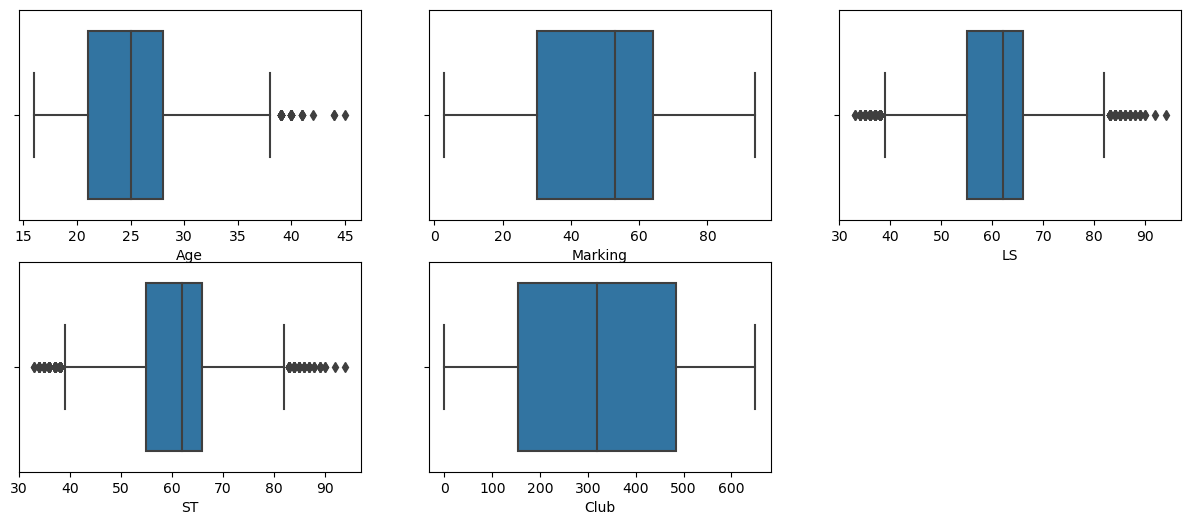

In [23]:
plt.figure(figsize = (15, 6))
plt.subplot(2,3,1)
sns.boxplot(data = df, x = df["Age"])

plt.subplot(2,3,2)
sns.boxplot(data = df, x = df["Marking"])

plt.subplot(2,3,3)
sns.boxplot(data = df, x = df["LS"])

plt.subplot(2,3,4)
sns.boxplot(data = df, x = df["ST"])

plt.subplot(2,3,5)
sns.boxplot(data = df, x = df["Club"])

Below is function to remove outliers from all the columns,

In [24]:
def outlier(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw,uw

In [25]:
for i in ['Age','Marking','LS','ST','Club']:
    lw,uw = outlier(df[i])
    df[i] = np.where(df[i] > uw,uw,df[i])
    df[i] = np.where(df[i] < lw,lw,df[i])

###  distribution

<font size=3>    distribution of Age

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


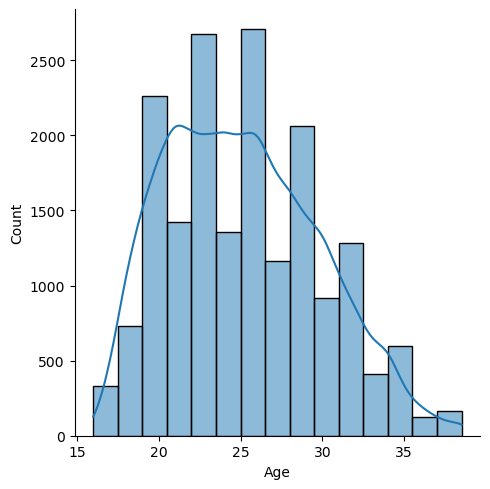

In [31]:
sns.displot(df["Age"], bins = 15, kde = True)
plt.show()

Age feature is slightly right skewed

<font size = 3>  distribution of Club

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


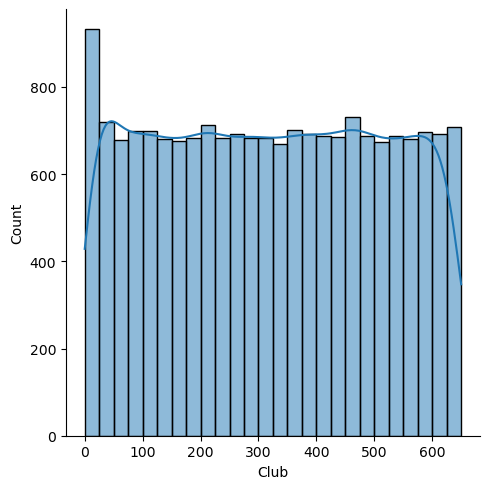

In [32]:
sns.displot(data = df["Club"],kde = True)
plt.show()

Club feature shows normal distribution.
This script will generate a histogram of the "club" column with an overlay of a normal distribution curve. 